# Bikes


This is similar to https://docs.pymc.io/projects/examples/en/latest/BART/BART_introduction.html

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
with pm.Model(rng_seeder=rng) as model_bikes:
    σ = pm.HalfNormal("σ", Y.std())
    μ = pm.BART("μ", X, Y, m=50)
    y = pm.Normal("y", μ, σ, observed=Y)
    idata_bikes = pm.sample()

BART is experimental. Use with caution.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 87 seconds.
The acceptance probability does not match the target. It is 0.8864, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


### Partial dependence plots

/u/32/martino5/unix/proyectos/00_BM/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/u/32/martino5/unix/proyectos/00_BM/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/u/32/martino5/unix/proyectos/00_BM/arviz/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/u/32/martino5/unix/proyectos/00_BM/arviz/arvi

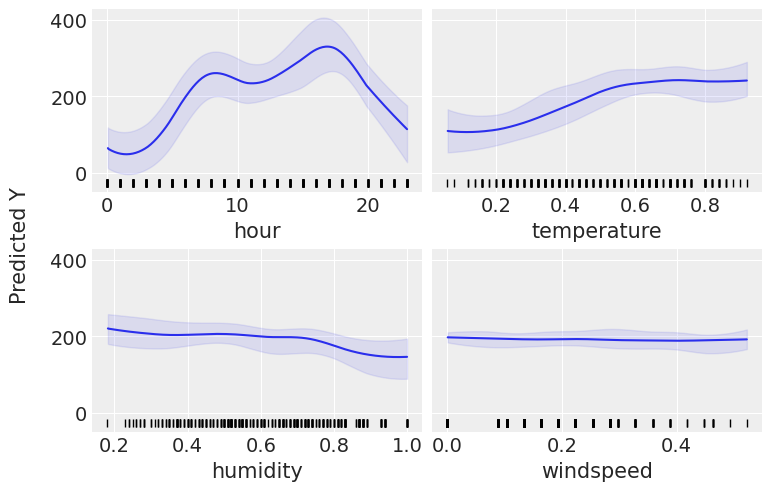

In [5]:
pm.bart.plot_dependence(idata_bikes, X=X, Y=Y, grid=(2, 2));
# plt.savefig("pdp_discrete.png", bbox_inches='tight')

### Variable importance

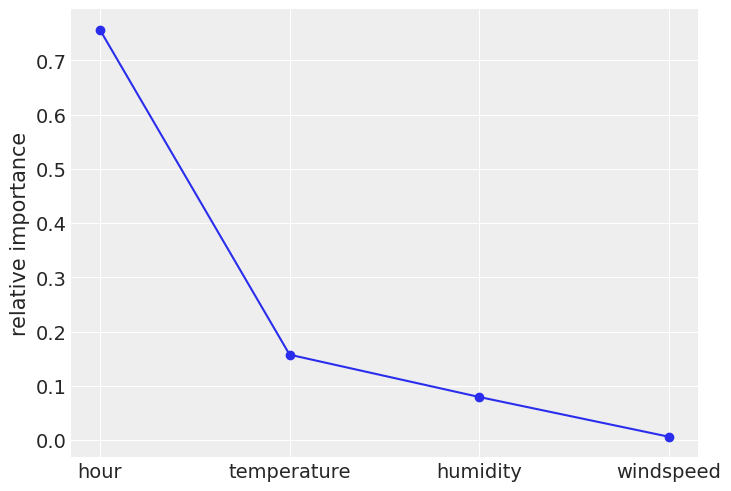

In [6]:
_, ax = plt.subplots(1)
VI = (
    idata_bikes.sample_stats["variable_inclusion"]
    .stack(samples=("chain", "draw"))
    .mean("samples")
    .values
)
ax.plot(VI / VI.sum(), "o-")
ax.set_xticks(range(4))
ax.set_xticklabels(["hour", "temperature", "humidity", "windspeed"])
ax.set_ylabel("relative importance");